# 3250 Foundations of Data Science – Homework Assignment 5
### Auto-correlation of stock prices

#### Import required packages

In [41]:
import pandas_datareader.data as web
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

#### First import all of the data into series objects

In [42]:
start = datetime.datetime(2012, 7, 31)
end = datetime.datetime(2017, 6, 30)
## Apple
aapl = web.DataReader('AAPL', 'google', start, end)
## Blackberry
bbry = web.DataReader('BBRY', 'google', start, end)
## Lululemon
lulu = web.DataReader('LULU','google', start, end)
## Amazon
amzn = web.DataReader('AMZN','google', start, end)


#### Define a function to plot and display auto-correlation

In [43]:
## Define a function to plot the auto-correlation for close-prices or returns
def plot_autocorrel(data, plot_option, stock_nm):
    plt.xlabel("Lag")
    plt.ylabel("Correlation")
    if plot_option == 'Close_Price':
        plt.acorr(data.Close, maxlags = (len(data)-1))
        plt.title(stock_nm + ": Month End close-price auto-correlation")
    elif plot_option == 'Returns':
        plt.acorr(data, maxlags = (len(data)-1))
        plt.title(stock_nm + ": Month End Returns auto-correlation")
    plt.show()

#### Then select month end data and plot close price auto-correlations
It seems from examining the plots that there is a positive auto-correlation between month-end close prices. The degree of correlation seems to decrease with increasing lag.
One possible reason could be that factors affecting the price of a stock stay constant for a period of time, thereby affecting the price of a stock consistently over that time period. However, over longer periods of time, the effect dies down, decreasing the correlation.

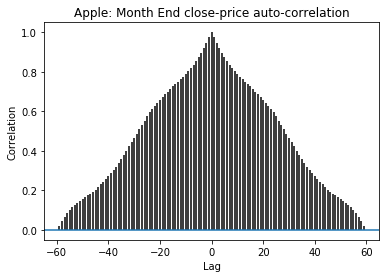

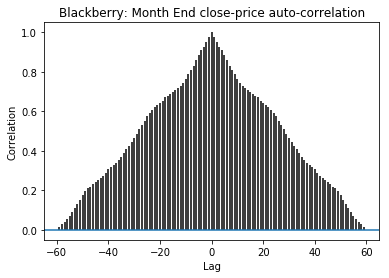

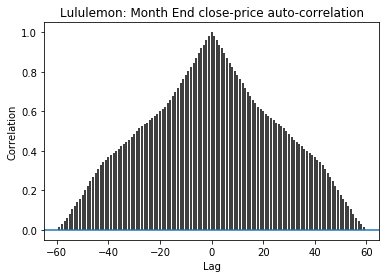

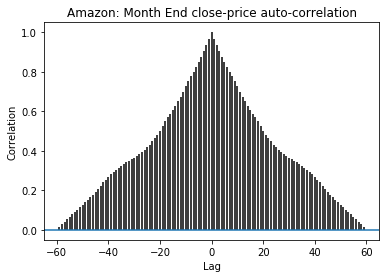

In [44]:
## Get Month End Data: group by month and select the last record for each.
## And plot the auto-correlation of prices for each stock

## Apple
aapl_mth_end_dta = aapl.groupby(pd.TimeGrouper(freq='M')).last()
plot_autocorrel(data = aapl_mth_end_dta, plot_option = 'Close_Price', stock_nm = 'Apple')

## Blackberry
bbry_mth_end_dta = bbry.groupby(pd.TimeGrouper(freq='M')).last()
plot_autocorrel(data = bbry_mth_end_dta, plot_option = 'Close_Price', stock_nm = 'Blackberry')

## Lululemon
lulu_mth_end_dta = lulu.groupby(pd.TimeGrouper(freq='M')).last()
plot_autocorrel(data = lulu_mth_end_dta, plot_option = 'Close_Price', stock_nm = 'Lululemon')

## Amazon
amzn_mth_end_dta = amzn.groupby(pd.TimeGrouper(freq='M')).last()
plot_autocorrel(data = amzn_mth_end_dta, plot_option = 'Close_Price', stock_nm = 'Amazon')

#### Then calculate monthly returns on close-price and plot auto-correlations
For month-end returns, the auto-correlation seems to have greater variability. However, the degree of correlation is very low (between 0.25 and -0.2 for all four stocks). Interestingly, month-end returns on Amazon stock seem to show more uniform postive auto-correlation than the other three, which have a mixture of positive and negative values.
Once again, the degree of auto-correlation drops to zero with increasing lag.

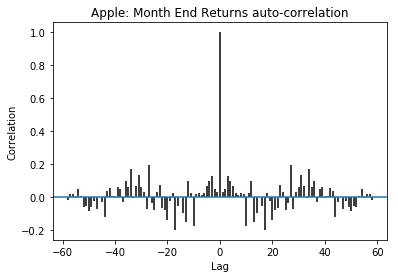

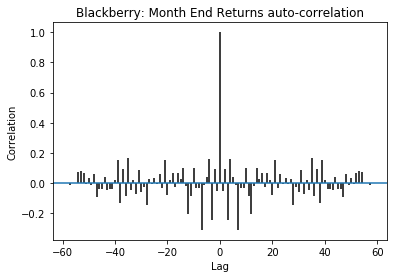

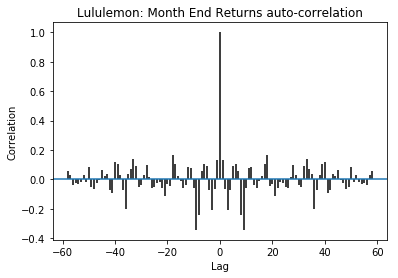

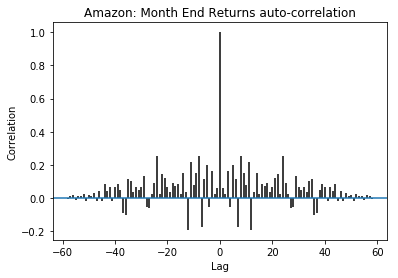

In [51]:
## Calculate returns by shifting the index by 1 and calculating ratio of change in price to previous close price
## And also plot the auto-correlation of returns.

## Apple
aapl_mth_end_returns = (aapl_mth_end_dta.Close/aapl_mth_end_dta.Close.shift(1)) - 1
aapl_mth_end_returns.dropna(inplace=True)
plot_autocorrel(data = aapl_mth_end_returns, plot_option = 'Returns', stock_nm = 'Apple')

## Blackberry
bbry_mth_end_returns = (bbry_mth_end_dta.Close/bbry_mth_end_dta.Close.shift(1)) - 1
bbry_mth_end_returns.dropna(inplace=True)
plot_autocorrel(data = bbry_mth_end_returns, plot_option = 'Returns', stock_nm = 'Blackberry')

## Lululemon
lulu_mth_end_returns = (lulu_mth_end_dta.Close/lulu_mth_end_dta.Close.shift(1)) - 1
lulu_mth_end_returns.dropna(inplace=True)
plot_autocorrel(data = lulu_mth_end_returns, plot_option = 'Returns', stock_nm = 'Lululemon')

## Amazon
amzn_mth_end_returns = (amzn_mth_end_dta.Close/amzn_mth_end_dta.Close.shift(1)) - 1
amzn_mth_end_returns.dropna(inplace=True)
plot_autocorrel(data = amzn_mth_end_returns, plot_option = 'Returns', stock_nm = 'Amazon')